###Hamiltoniano

El sistema se modela con el modelo de Ising de campo aleatorio. El Hamiltoniano del sistema incorpora, además de la interacción de los espines vecinos, un término de la interacción de cada espín con el campo externo (que va a cambiar en el tiempo), y con un campo local aleatorio. 

$$ H = - \sum_{\langle i, j \rangle} J s_i s_j - \sum_{i}(H(t) + h_i)s_i $$

El campo aleatorio se escoge dentro de una distribución Gaussiana:

$$ P(h) =  \frac{1}{\sqrt{2 \pi} R} e^{-h^2/2R^2} $$

Podemos reescribir al Hamiltoniano de la siguiente forma:


$$ H = - \sum_i \, \left[ \sum_{\langle j_i \rangle} J s_i s_j + (H(t) + h_i)s_i\right] $$

donde usamos la notación $\langle j_i \rangle$ para referirnos a los índices de los espines que son primeros vecinos de $s_i$.

Con la suma explícita corriendo sobre el índice $i$, es claro ahora que para un espín fijo $s_i$, la contribución a la energía total del sistema es:

$$ H_i = - s_i \, \left[J \sum_{\langle j_i \rangle} s_j + H(t) + h_i \right] $$
$$     = - s_i T_i $$

###Evolución

Tomamos la temperatura igual a cero, y hacemos que todos los espines apunten hacia abajo. El campo externo se va a incrementar de $-\infty$ a $+\infty$, adiabáticamente, y posteriormente se va a disminuir en sentido contrario.

Originalmente todos los espines apuntan hacia abajo. El campo $H(t)$ es negativo y más grande en valor absoluto que $h_i$, (ésto es $H(t) + h_i < 0$) así que $H_i <0 \, \, \forall i$. 

Empezamos a incrementar el campo externo y buscamos cuándo es más favorable energéticamente que el espín $s_i$ se voltee. Ésto ocurre cuando $T_i$ se vuelve positivo, y por lo tanto $H_i$ se vuelve positivo. Entonces, $s_i$ cambia de signo y hace que $H_i$ sea de nuevo negativo. 

Cuando hacemos el camino inverso, disminuyendo el campo, $s_i$ apunta en un principio hacia arriba y ocurre lo contrario. $T_i$ originalmente es positivo, y cuando se vuelve negativo $s_i$ se voltea para hacer que $H_i$ se mantenga negativo.

# Modelo

In [1]:
using PyPlot

INFO: Loading help data...


In [2]:
using Histeresis

In [3]:
L = 50
R = 4
N = L^2
espin = -1 # Empezamos con los espines apuntando hacia abajo, e incrementamos el campo H
m = edo_inicial(L,R,espin)

H_set = 15
@time mag1, hs1 = magnetizacion_aumenta_H!(m,H_set,espin) ;

elapsed time: 0.790558399 seconds (31940192 bytes allocated, 10.78% gc time)


In [4]:
# Espines apuntando hacia abajo, y disminuimos el campo H
@time mag2, hs2 = magnetizacion_aumenta_H!(m,-H_set,-espin) ;

elapsed time: 0.451531281 seconds (25461432 bytes allocated, 17.24% gc time)


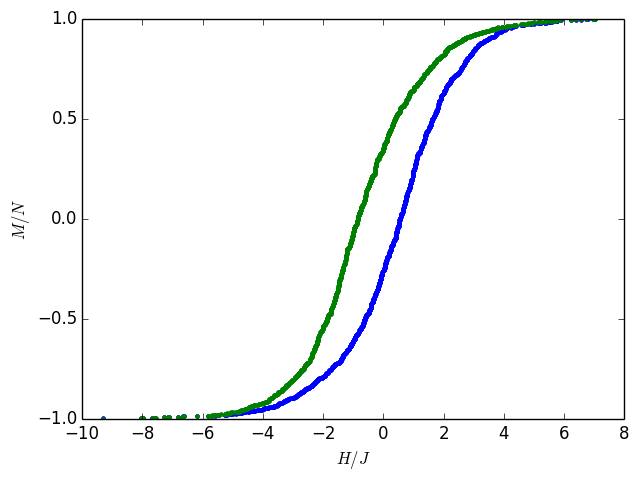

In [5]:
figure(figsize=(7,5))
xlabel(L"H/J") #J=1
ylabel(L"M/N")

plot(hs1,mag1/N, ".")
plot(hs2,mag2/N, ".");